# Interpolation Problem Statement

Given a set of nodes $\{x_i, 0 \leq i \leq n\}$ and corresponding data values $\{y_i, 0 \leq i \leq n\}$, find the polynomial $p_n(x)$ of degree less than or equal to $n$, such that $$p_n(x_i)=y_i, 0 \leq i \leq n.$$

# Lagrange Interpolation

In general, plolynomial of $n$ degree is define as follows
$$p_n(x)=a_0x^n+a_1x^{n-1}+...+a_{n-1}x+a_n.$$
For example, for $n=2$
$$p_2(x)=ax^2+bx+c.$$
The Lagrange polynomyal is defined as follows
$$p_n(x) = \sum_{k=0}^{n}y_kL_k^{(n)}(x)$$
where $L_k^{(n)}(x)$ is defined as
$$L_k^{(n)}(x)=\prod_{\begin{array}{c}i=0\\ i \neq k\end{array}}^{n}\frac{x-x_i}{x_k-x_i}$$
the polynomials $L_k^{(n)}(x)$ have an interesting propoerty
$$L_i^{(n)}(x_j)=\delta_{ij}=
\begin{cases}
  1, i=j,\\    
  0, i \neq j.    
\end{cases}$$
<i><b>Note:</b> $\delta_{ij}$ is called Kronecker delta.</i><br><br>
It can be proved that the polynomial $p_n(x)$ exists and is unique.

## Example #1
Find the polynomial of degree 2 that interpolates at the data points
$$x_0=0, y_0=1, x_1=1, y_1=2, x_2=4, y_2=2.$$
The right answer is
$$p_2(t)=-\frac{1}{4}t^2+\frac{5}{4}t+1.$$
By definition,
$$p_2(x_i)=y_i$$
that is
$$p_2(0)=1$$
$$p_2(1)=2$$
$$p_2(4)=2$$
Lets visualize the given data points:

Lagrange polynomial values in the data points:
p(0.000000) = 1.000000
p(1.000000) = 2.000000
p(4.000000) = 2.000000


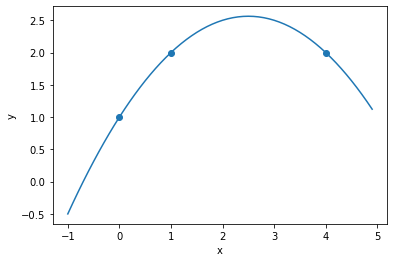

In [9]:
from matplotlib import pyplot as plt

#data points
x = [0.0, 1.0, 4.0]
y = [1.0, 2.0, 2.0]

#Lagrange interpolation
def lagrange(_x, x, y):
    p = 0.0 #Lagrange polynomial value
    n = len(x)    
    for k in range(n):        
        L = 1.0
        for i in range(n):
            if i != k:                
                L *= (_x - x[i]) / (x[k] - x[i])                                
        p += y[k] * L
    return p

print("Lagrange polynomial values in the data points:")
for xi in x:
    yi = lagrange(xi, x, y)
    print("p(%f) = %f" %(xi, yi))
    
N = 60
h = 0.1
xi = -1
lx = []
ly = []
for j in range(N):
    yi = lagrange(xi, x, y)
    lx.append(xi)
    ly.append(yi)
    xi += h
    
    
plt.xlabel("x")
plt.ylabel("y")

#visualization of data points
plt.scatter(x, y)
#visualize Lagrange polynomial    
plt.plot(lx, ly)

plt.show()


# Newton Interpolation

Given a set of $n+1$ data points:
$$(x_0,y_0), (x_1,y_1), ..., (x_n,y_n)$$
where $x_i \neq x_j$ for each $i \neq j$.<br>
The Newton interpolation polynomial is defined as
$$N(x)=\sum_{k=0}^{n}a_kn_k(x)$$
where $n_k(x)$ are Newton basis polynomials
$$n_k(x)=\prod_{i=0}^{k-1}(x-x_i)$$
and the coeficients $a_k$ are divided differences:
$$a_k=[y_0,...,y_k].$$
The divided differences are defined as follows:
$$a_0=y_0$$
$$a_1=[y_0,y_1]=\frac{y_1-y_0}{x_1-x_0}$$
$$a_2=[y_0,y_1,y_2]=\frac{[y_1,y_2]-[y_0,y_1]}{x_2-x_0}$$
$$...$$
$$a_k=[y_0,...,y_k]=\frac{[y_1,...,y_k]-[y_0,...,y_{k-1}]}{x_k-x_0}$$

## Example #2

Construct the polynomial of degree 3 that interplates the data
$$x_0=1, y_0=1, x_1=2, y_1 = \frac{1}{2}, x_2=4, y_2=\frac{1}{4}, x_3=3, y_3=\frac{1}{3}$$
The right answer is
$$p(t)=\frac{1}{24}(50-35t+10t^2-t^3).$$
So, the table with divided differences is the following:

Divided Differences:  [1.0, -0.5, 0.16666666666666666, -0.04166666666666666]
N(1.000000) = 1.000000
N(2.000000) = 0.500000
N(3.000000) = 0.333333
N(4.000000) = 0.250000


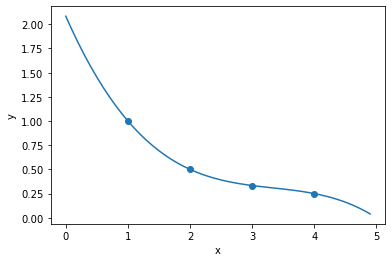

In [11]:
from matplotlib import pyplot as plt

#data points
x = [1.0, 2.0, 3.0, 4.0]
y = [1.0, 0.5, 1.0 / 3.0, 0.25]

def diff(i, k, x, y):
    if k == 0:
        return y[i]
    elif k == 1:
        return (y[i + 1] - y[i]) / (x[i + 1] - x[i])
    else:
        return (diff(i + 1, k - 1, x, y) - diff(i, k - 1, x, y)) / (x[i + k] - x[i])

#divided differences
n = len(x)
dy = []
for k in range(n):
    dy.append(diff(0, k, x, y))
print("Divided Differences: ", dy)

#Newton basis polynomials
def n(_x, k, x):
    v = 1
    for k in range(k):
        v *= (_x - x[k])
    return v

#Newton polynomials
def N(_x, x, dy):
    v = 0
    for k in range(len(x)):
        v += dy[k] * n(_x, k, x)
    return v

#Value of the Newton polynomial in the data points
for i in range(len(x)):
    print("N(%f) = %f" %(x[i], N(x[i], x, dy)))

#visualization of data points
plt.xlabel("x")
plt.ylabel("y")
plt.scatter(x, y)

#visualization of the Newton polynomial
h = 0.1
xi = 0
nx = []
ny = []
for j in range(50):
    nx.append(xi)
    ny.append(N(xi, x, dy))
    xi += h
plt.plot(nx, ny)

plt.show()